In [16]:
# импортируйте нужные библиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

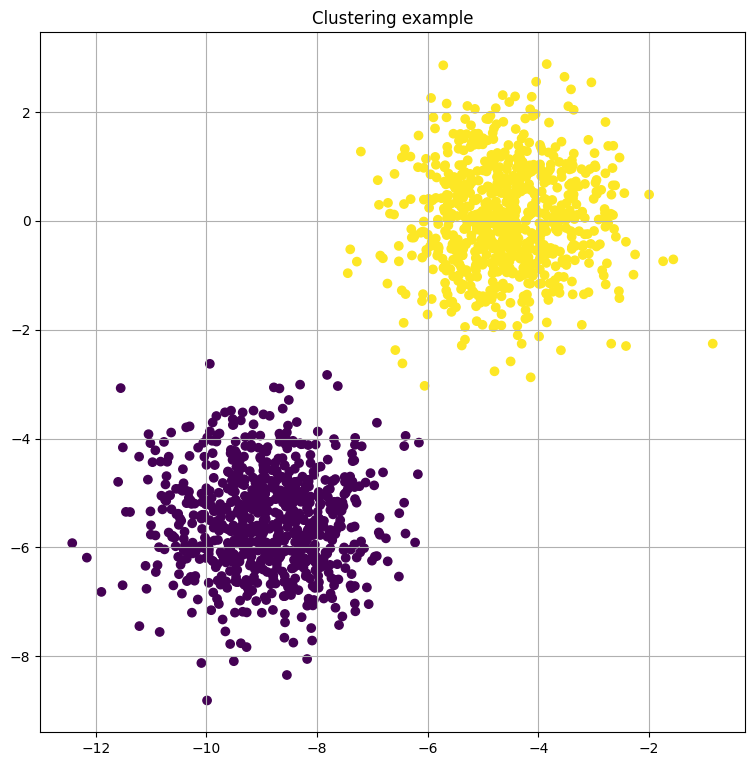

In [17]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(20, 20))

n_samples = 1500
random_state = 170

X_varied, y_varied = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Clustering example")
plt.grid()

plt.show()

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

![avatar](tink.jpg)

#### Задание №2. Напишите собственную логистическую регрессию

In [18]:
def a(x, w):
    return 1/(1+np.exp(-np.dot(x, w)))

In [19]:
class MyLogRegression():
    
    def __init__(self, batch_size=25, lr=0.1, num_steps=1000):
        self.batch_size = batch_size
        self.lr = lr
        self.num_steps = num_steps
    
    def fit(self, X, Y):
        #print(X)
        matr = np.ones((X.shape[0], 1))
        X = np.hstack((X, matr))
        #print(X)
        w = np.random.uniform(-5, 5, X.shape[1])
        for i in range(self.num_steps):
            sample_indices = np.random.randint(X.shape[0], size=self.batch_size)
            w -= self.lr*np.dot((-Y[sample_indices]+a(X[sample_indices], w)), X[sample_indices])
        self.w = w
        return self.w
    
    def predict(self, X):
        matr = np.ones((X.shape[0], 1))
        X = np.hstack((X, matr))   
        return a(X, self.w) >= 0.5

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_varied, y_varied)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
target = clf.predict(X_test)
print("Sklearn логистическая регрессия: ", accuracy_score(y_test, target))

Sklearn логистическая регрессия:  1.0


In [22]:
log = MyLogRegression()
log.fit(X_train, y_train)
y_target = log.predict(X_test)
print("Моя логистическая регрессия: ", accuracy_score(y_test, y_target))

Моя логистическая регрессия:  0.992
